<a href="https://colab.research.google.com/github/coopaloop536/Cooper_CO2_Emissions/blob/main/CO2_Emissions_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas
import pandas as pd

!pip install matplotlib
import matplotlib.pyplot as plt


In [3]:
url = 'https://pasteur.epa.gov/uploads/10.23719/1531143/SupplyChainGHGEmissionFactors_v1.3.0_NAICS_byGHG_USD2022.csv'
df = pd.read_csv(url)
df.head(20)

,2017 NAICS Code,2017 NAICS Title,GHG,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Reference USEEIO Code
0,111110,Soybean Farming,HFC-23,"kg/2022 USD, purchaser price",3.230000e-09,1.340000e-09,4.570000e-09,1111A0
1,111110,Soybean Farming,Carbon dioxide,"kg/2022 USD, purchaser price",1.340000e-01,3.780000e-02,1.720000e-01,1111A0
2,111110,Soybean Farming,HFC-236fa,"kg/2022 USD, purchaser price",1.440000e-10,2.020000e-10,3.450000e-10,1111A0
3,111110,Soybean Farming,Carbon tetrafluoride,"kg/2022 USD, purchaser price",5.130000e-09,5.970000e-09,1.110000e-08,1111A0
4,111110,Soybean Farming,HFC-32,"kg/2022 USD, purchaser price",3.000000e-08,4.200000e-08,7.200000e-08,1111A0
5,111110,Soybean Farming,Hexafluoroethane,"kg/2022 USD, purchaser price",5.420000e-10,1.510000e-09,2.050000e-09,1111A0
6,111110,Soybean Farming,"HFCs and PFCs, unspecified","kg CO2e/2022 USD, purchaser price",3.580000e-04,4.860000e-04,8.440000e-04,1111A0
7,111110,Soybean Farming,HFC-125,"kg/2022 USD, purchaser price",4.560000e-08,6.190000e-08,1.080000e-07,1111A0
8,111110,Soybean Farming,Methane,"kg/2022 USD, purchaser price",3.310000e-04,1.510000e-04,4.820000e-04,1111A0
9,111110,Soybean Farming,HFC-134a,"kg/2022 USD, purchaser price",7.480000e-08,1.010000e-07,1.760000e-07,1111A0


In [9]:
renamed_columns = {'2017 NAICS Code':'NAICS Code', '2017 NAICS Title':'Industry Title', 'GHG':'Greenhouse Gas Type', 'Unit':'Gas/USD', 'Supply Chain Emission Factors without Margins':'Emissions per Dollar w/ no Margains', 'Margins of Supply Chain Emission Factors':'Margins', 'Supply Chain Emission Factors with Margins':'Emissions per Dollar w/ Margains'}

df = df.rename(columns=renamed_columns)

df['NAICS Code'] = pd.to_numeric(df['NAICS Code'], errors='coerce') ## NAICS Code turns into a numeric datatype

df = df.dropna(subset=['NAICS Code']) ## Drops any rows that are missing NAICS Code

df['NAICS Code'] = df['NAICS Code'].astype(int) ## Turns NAICS Code into an integer because sometimes there's floats

df['NAICS Code'] = df['NAICS Code'].astype(str).str.zfill(6) ## Makes sure the NAICS Code is always 6 digits long because somewhere in the dataset there is a sub-6-digit NAICS Code

def truncate_naics(naics_code, digits=2): ## Truncates the NAICS Code to the specified number of digits which is 2 in this case
    return naics_code[:digits]

grouped_2digit = df.groupby(df['NAICS Code'].apply(lambda x: truncate_naics(x, digits=2)))['Emissions per Dollar w/ Margains'].mean() ## Groups the data by the first 2 digits of the NAICS Code and calculates the average emissions per dollar

grouped_2digit = grouped_2digit.sort_values(ascending=False) ## Sorts the data by the average emissions per dollar in descending order


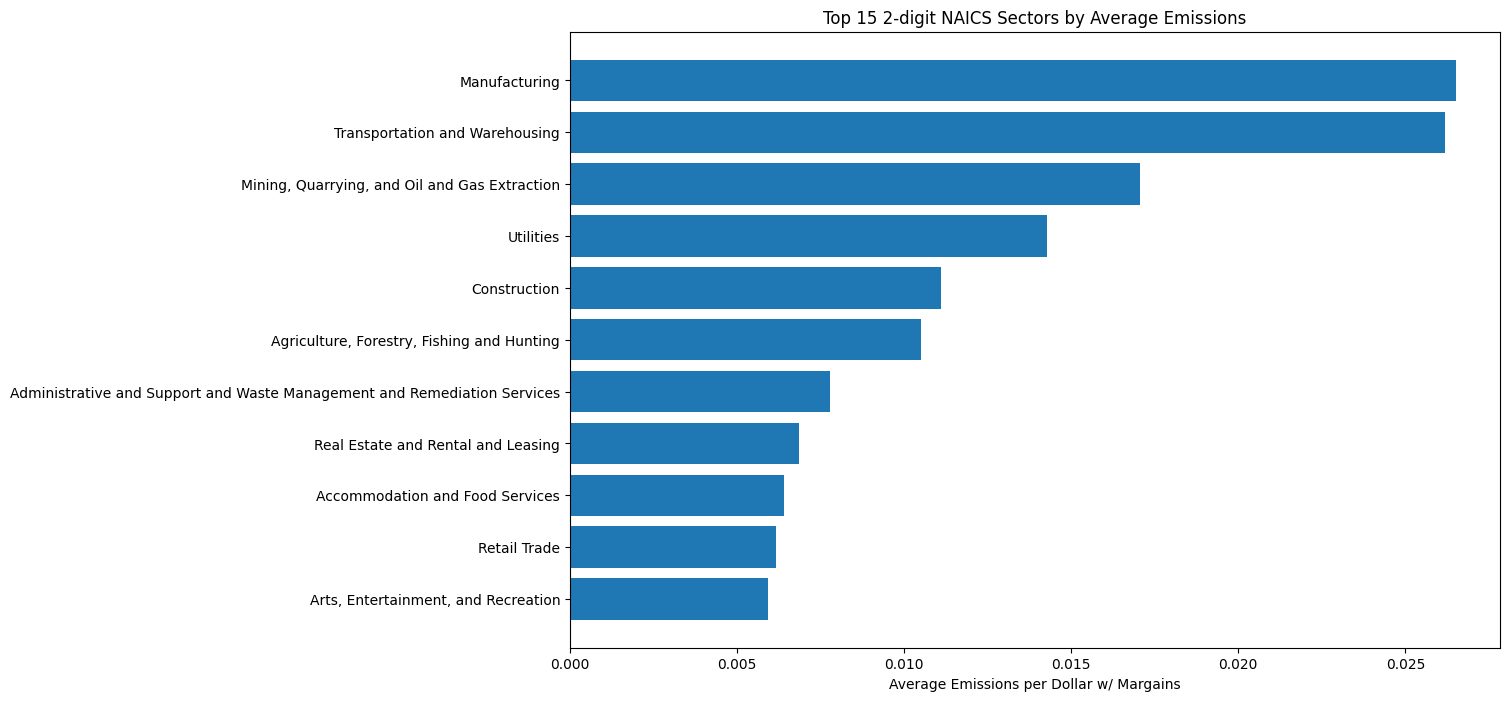

In [8]:
naics_2digit_names = {
    '11': 'Agriculture, Forestry, Fishing and Hunting',
    '21': 'Mining, Quarrying, and Oil and Gas Extraction',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale Trade',
    '44': 'Retail Trade',
    '48': 'Transportation and Warehousing',
    '56': 'Administrative and Support and Waste Management and Remediation Services',
    '49': 'Transportation and Warehousing',
    '72': 'Accommodation and Food Services',
    '53': 'Real Estate and Rental and Leasing',
    '71': 'Arts, Entertainment, and Recreation',
    '62': 'Health Care and Social Assistance',
    '45': 'Retail Trade'
    }

labels = grouped_2digit.index.map(naics_2digit_names.get)
plt.figure(figsize=(12, 8))
plt.barh(labels[:15], grouped_2digit.head(15))  # top 15 sectors

plt.xlabel('Average Emissions per Dollar w/ Margains')
plt.title('Top 15 2-digit NAICS Sectors by Average Emissions')
plt.gca().invert_yaxis()  # Highest emission on top
plt.show()

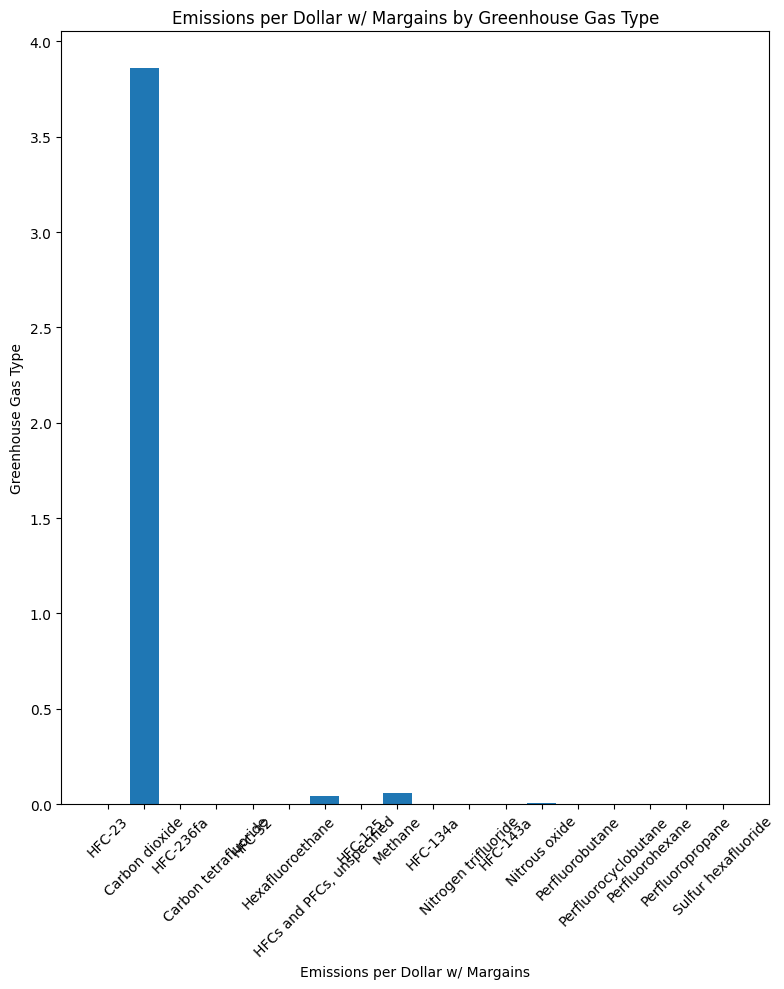

In [20]:
plt.figure(figsize=(8, 10))
plt.bar(df['Greenhouse Gas Type'], df['Emissions per Dollar w/ Margains'])
plt.xlabel('Emissions per Dollar w/ Margains')
plt.ylabel('Greenhouse Gas Type')
plt.title('Emissions per Dollar w/ Margains by Greenhouse Gas Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
df.shape

(18288, 8)